<img style="float: left;" src="../earth-lab-logo-rgb.png" width="150" height="150">

# Earth Data Science Corps Summer 2020

![Colored Bar](../colored-bar.png)

## Earth Science Loops Exercises 

Now that you've learned how to utilize loops in **Python**, it's time to test your skills! Complete the activites below. Feel free to work together with a colleague or friend! 

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Clean up the Code

A co-worker of yours who is very new to **Python** is trying to help you work with some time series data. You are trying to find the average sum of precipitation per month in Boulder, CO. from 2003 to 2013. Unfortunately, once they started the project they weren't able to finish it, and they passed their code on to you. Look at the code they passed you below, and clean it up where you can so that it does the analysis correctly, and the code is legible and clean.

Be sure to identify issues in the following areas:

- Syntax: Did they follow pep8 standards when writing their code? Is the code legible?
- Modularity: Is the code efficient? Is there a better, cleaner way to code what they're doing?
- Typos: Are the variable names correct? Did they do what they were intending to do with the data?
- Documentation: Is the code well documented? Do the comments provide context and/or clarity?
- Expressiveness: Are the variable names meaningful and representative of the data they store?

</div>

In [1]:
# HI! Doing an analysis of precip data per month for years in boulder
import os

import pandas
import matplotlib.pyplot as plt
import earthpy as et

# Getting the data from internet

et.data.get_data(
    url="https://raw.githubusercontent.com/earthlab/version-control-hot-mess/master/data/data_urls.csv")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data", "earthpy-downloads"))

# Got the data, nice
data_dataframe = pandas.read_csv("data_urls.csv")

data_dataframe.head()

,url
0,https://s3-us-west-2.amazonaws.com/earthlab-te...
1,https://s3-us-west-2.amazonaws.com/earthlab-te...
2,https://s3-us-west-2.amazonaws.com/earthlab-te...
3,https://s3-us-west-2.amazonaws.com/earthlab-te...
4,https://s3-us-west-2.amazonaws.com/earthlab-te...


In [2]:

# This isn't the data I was expecting, looks like I have to get even more data

et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2003-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2004-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2005-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2006-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2007-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2008-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2009-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2010-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2011-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2012-boulder.csv')
et.data.get_data(url='https://s3-us-west-2.amazonaws.com/earthlab-teaching/vchm/My_Data2013-boulder.csv')

'C:\\Users\\Nathan\\earth-analytics\\data\\earthpy-downloads\\My_Data2013-boulder.csv'

In [3]:
# Whoops! Forgot to import glob lol

import glob

csv_list = glob.glob("My_Data2003-boulder.csv")
csv_list.append(glob.glob("My_Data2004-boulder.csv"))
csv_list.append(glob.glob("My_Data2005-boulder.csv"))
csv_list.append(glob.glob("My_Data2006-boulder.csv"))
csv_list.append(glob.glob("My_Data2007-boulder.csv"))

# Gotta get each year


csv_list.append(glob.glob("My_Data2011-boulder.csv"))
csv_list.append(glob.glob("My_Data2012-boulder.csv"))
csv_list.append(glob.glob("My_Data2013-boulder.csv"))
csv_list.append(glob.glob("My_Data2008-boulder.csv"))
csv_list.append(glob.glob("My_Data2009-boulder.csv"))
csv_list.append(glob.glob("My_Data2010-boulder.csv"))

# Ok got all the csv's in a list

# So now I want to add up all of my data by month.

In [4]:
# Reading all data into a new pandas dataframe
# The only things that weren't numbers in the HPCP column were " " and "missing" so im going to guess those are the na values.

# Need pandas!!!
import pandas

precip_data_2003 = pandas.read_csv(csv_list[0], parse_dates=["DATE"], index_col=[
                                   "DATE"], na_values=[" ", "missing"])
# I really just want the HPCP column, so I'll get it out of the main dataframe
precip_data_2003 = precip_data_2003[["HPCP"]]
# Checking data is clean
precip_data_2003.head()

,HPCP
DATE,
2003-01-01 01:00:00+00:00,0.0
2003-02-01 01:00:00+00:00,0.0
2003-02-02 19:00:00+00:00,0.2
2003-02-02 22:00:00+00:00,0.1
2003-02-03 02:00:00+00:00,0.1


In [5]:
# Doing the next year, seems to need to be indexed again...odd
# 2003 didn't need to be indexed again, but 2004 is in a list or something. ew.

precip_data_2004 = pandas.read_csv(csv_list[1][0], parse_dates=[
                                   "DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2004 = precip_data_2003[["HPCP"]]

In [6]:
# I think that worked so I'll do it for the rest of the years
# Just copy and pasted the data I need
# I like copy and paste :)

# Need pandas!!!
import pandas

precip_data_2005 = pandas.read_csv(csv_list[2][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2005 =precip_data_2003[["HPCP"]]

precip_data_2006 = pandas.read_csv(csv_list[3][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2006 =precip_data_2003[["HPCP"]]

precip_data_2007 = pandas.read_csv(csv_list[4][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2007 =precip_data_2003[["HPCP"]]

precip_data_2008 = pandas.read_csv(csv_list[5][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2008 =precip_data_2003[["HPCP"]]

precip_data_2009 = pandas.read_csv(csv_list[6][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2009 =precip_data_2003[["HPCP"]]

# o m G there are so many dates to write up

precip_data_2010 = pandas.read_csv(csv_list[7][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2010 =precip_data_2003[["HPCP"]]

precip_data_2011 = pandas.read_csv(csv_list[8][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2011 =precip_data_2003[["HPCP"]]

precip_data_2012 = pandas.read_csv(csv_list[9][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2012 =precip_data_2003[["HPCP"]]

precip_data_2013 = pandas.read_csv(csv_list[10][0], parse_dates=["DATE"], index_col=["DATE"], na_values=[" ", "missing"])
precip_data_2013 =precip_data_2003[["HPCP"]]

# Check another year to make sure that the data is good! 

precip_data_2010.head()

,HPCP
DATE,
2003-01-01 01:00:00+00:00,0.0
2003-02-01 01:00:00+00:00,0.0
2003-02-02 19:00:00+00:00,0.2
2003-02-02 22:00:00+00:00,0.1
2003-02-03 02:00:00+00:00,0.1


In [7]:
# Now I need to resample each year by month.

# I want to add all the values found in a month together as a sum
# Found this cool code online! I think it does what I want, not sure...just copy/pasted it
# Pretty sure this works, not 100% certain tho
monthly_precip_sum_2003 = precip_data_2003.resample('M').max()
monthly_precip_sum_2004 = precip_data_2004.resample('M').max()
monthly_precip_sum_2005 = precip_data_2005.resample('M').max()
monthly_precip_sum_2006 = precip_data_2006.resample('M').max()
monthly_precip_sum_2007 = precip_data_2007.resample('M').max()
monthly_precip_sum_2008 = precip_data_2008.resample('M').max()
monthly_precip_sum_2009 = precip_data_2009.resample('M').max()
monthly_precip_sum_2010 = precip_data_2010.resample('M').max()
monthly_precip_sum_2011 = precip_data_2011.resample('M').max()
monthly_precip_sum_2012 = precip_data_2012.resample('M').max()
monthly_precip_sum_2013 = precip_data_2013.resample('M').max()

# Ok now I can add up all the sums for each month and divide them by 12 to get the average sum of rainfall for each month! 

############
# GOAL: Use Python to add all the data from each year together!

january_month = monthly_precip_sum_2003.iloc[0].HPCP + monthly_precip_sum_2004.iloc[0].HPCP + monthly_precip_sum_2005.iloc[0].HPCP + monthly_precip_sum_2006.iloc[0].HPCP + monthly_precip_sum_2007.iloc[0].HPCP + monthly_precip_sum_2008.iloc[0].HPCP + monthly_precip_sum_2009.iloc[0].HPCP + monthly_precip_sum_2010.iloc[0].HPCP + monthly_precip_sum_2011.iloc[0].HPCP + monthly_precip_sum_2012.iloc[0].HPCP + monthly_precip_sum_2013.iloc[0].HPCP
january_month = january_month/12

# This is going to take forever to write up!
# i'd like a snack

feb_month = monthly_precip_sum_2003.iloc[1].HPCP + monthly_precip_sum_2004.iloc[1].HPCP + monthly_precip_sum_2005.iloc[1].HPCP + monthly_precip_sum_2006.iloc[1].HPCP + monthly_precip_sum_2007.iloc[1].HPCP + monthly_precip_sum_2008.iloc[1].HPCP + monthly_precip_sum_2009.iloc[1].HPCP + monthly_precip_sum_2010.iloc[1].HPCP + monthly_precip_sum_2011.iloc[1].HPCP + monthly_precip_sum_2012.iloc[1].HPCP + monthly_precip_sum_2013.iloc[1].HPCP
feb_month = feb_month/12

march_month = monthly_precip_sum_2003.iloc[2].HPCP + monthly_precip_sum_2004.iloc[2].HPCP + monthly_precip_sum_2005.iloc[2].HPCP + monthly_precip_sum_2006.iloc[2].HPCP + monthly_precip_sum_2007.iloc[2].HPCP + monthly_precip_sum_2008.iloc[2].HPCP + monthly_precip_sum_2009.iloc[2].HPCP + monthly_precip_sum_2010.iloc[2].HPCP + monthly_precip_sum_2011.iloc[2].HPCP + monthly_precip_sum_2012.iloc[2].HPCP + monthly_precip_sum_2013.iloc[2].HPCP
march_month = march_month/12

april_month = monthly_precip_sum_2003.iloc[3].HPCP + monthly_precip_sum_2004.iloc[3].HPCP + monthly_precip_sum_2005.iloc[3].HPCP + monthly_precip_sum_2006.iloc[3].HPCP + monthly_precip_sum_2007.iloc[3].HPCP + monthly_precip_sum_2008.iloc[3].HPCP + monthly_precip_sum_2009.iloc[3].HPCP + monthly_precip_sum_2010.iloc[3].HPCP + monthly_precip_sum_2011.iloc[3].HPCP + monthly_precip_sum_2012.iloc[3].HPCP + monthly_precip_sum_2013.iloc[3].HPCP
april_month = april_month/12

may_month = monthly_precip_sum_2003.iloc[4].HPCP + monthly_precip_sum_2004.iloc[4].HPCP + monthly_precip_sum_2005.iloc[4].HPCP + monthly_precip_sum_2006.iloc[4].HPCP + monthly_precip_sum_2007.iloc[4].HPCP + monthly_precip_sum_2008.iloc[4].HPCP + monthly_precip_sum_2009.iloc[4].HPCP + monthly_precip_sum_2010.iloc[4].HPCP + monthly_precip_sum_2011.iloc[4].HPCP + monthly_precip_sum_2012.iloc[4].HPCP + monthly_precip_sum_2013.iloc[4].HPCP
may_month = may_month/12

#  my fingers are tired. may start lifting finger weights to help with endurance.

june_month = monthly_precip_sum_2003.iloc[5].HPCP + monthly_precip_sum_2004.iloc[5].HPCP + monthly_precip_sum_2005.iloc[5].HPCP + monthly_precip_sum_2006.iloc[5].HPCP + monthly_precip_sum_2007.iloc[5].HPCP + monthly_precip_sum_2008.iloc[5].HPCP + monthly_precip_sum_2009.iloc[5].HPCP + monthly_precip_sum_2010.iloc[5].HPCP + monthly_precip_sum_2011.iloc[5].HPCP + monthly_precip_sum_2012.iloc[5].HPCP + monthly_precip_sum_2013.iloc[5].HPCP
june_month = june_month/12

july_month = monthly_precip_sum_2003.iloc[6].HPCP + monthly_precip_sum_2004.iloc[6].HPCP + monthly_precip_sum_2005.iloc[6].HPCP + monthly_precip_sum_2006.iloc[6].HPCP + monthly_precip_sum_2007.iloc[6].HPCP + monthly_precip_sum_2008.iloc[6].HPCP + monthly_precip_sum_2009.iloc[6].HPCP + monthly_precip_sum_2010.iloc[6].HPCP + monthly_precip_sum_2011.iloc[6].HPCP + monthly_precip_sum_2012.iloc[6].HPCP + monthly_precip_sum_2013.iloc[6].HPCP
july_month = july_month/12

august_month = monthly_precip_sum_2003.iloc[7].HPCP + monthly_precip_sum_2004.iloc[7].HPCP + monthly_precip_sum_2005.iloc[7].HPCP + monthly_precip_sum_2006.iloc[7].HPCP + monthly_precip_sum_2007.iloc[7].HPCP + monthly_precip_sum_2008.iloc[7].HPCP + monthly_precip_sum_2009.iloc[7].HPCP + monthly_precip_sum_2010.iloc[7].HPCP + monthly_precip_sum_2011.iloc[7].HPCP + monthly_precip_sum_2012.iloc[7].HPCP + monthly_precip_sum_2013.iloc[7].HPCP
august_month = august_month/12

september_month = monthly_precip_sum_2003.iloc[8].HPCP + monthly_precip_sum_2004.iloc[8].HPCP + monthly_precip_sum_2005.iloc[8].HPCP + monthly_precip_sum_2006.iloc[8].HPCP + monthly_precip_sum_2007.iloc[8].HPCP + monthly_precip_sum_2008.iloc[8].HPCP + monthly_precip_sum_2009.iloc[8].HPCP + monthly_precip_sum_2010.iloc[8].HPCP + monthly_precip_sum_2011.iloc[8].HPCP + monthly_precip_sum_2012.iloc[8].HPCP + monthly_precip_sum_2013.iloc[8].HPCP
september_month = september_month/12

october_month = monthly_precip_sum_2003.iloc[9].HPCP + monthly_precip_sum_2004.iloc[9].HPCP + monthly_precip_sum_2005.iloc[9].HPCP + monthly_precip_sum_2006.iloc[9].HPCP + monthly_precip_sum_2007.iloc[9].HPCP + monthly_precip_sum_2008.iloc[9].HPCP + monthly_precip_sum_2009.iloc[9].HPCP + monthly_precip_sum_2010.iloc[9].HPCP + monthly_precip_sum_2011.iloc[9].HPCP + monthly_precip_sum_2012.iloc[9].HPCP + monthly_precip_sum_2013.iloc[9].HPCP
october_month = october_month/12

november_month = monthly_precip_sum_2003.iloc[10].HPCP + monthly_precip_sum_2004.iloc[10].HPCP + monthly_precip_sum_2005.iloc[10].HPCP + monthly_precip_sum_2006.iloc[10].HPCP + monthly_precip_sum_2007.iloc[10].HPCP + monthly_precip_sum_2008.iloc[10].HPCP + monthly_precip_sum_2009.iloc[10].HPCP + monthly_precip_sum_2010.iloc[10].HPCP + monthly_precip_sum_2011.iloc[10].HPCP + monthly_precip_sum_2012.iloc[10].HPCP + monthly_precip_sum_2013.iloc[10].HPCP
november_month = november_month/12

december_month = monthly_precip_sum_2003.iloc[11].HPCP + monthly_precip_sum_2004.iloc[11].HPCP + monthly_precip_sum_2005.iloc[11].HPCP + monthly_precip_sum_2006.iloc[11].HPCP + monthly_precip_sum_2007.iloc[11].HPCP + monthly_precip_sum_2008.iloc[11].HPCP + monthly_precip_sum_2009.iloc[11].HPCP + monthly_precip_sum_2010.iloc[11].HPCP + monthly_precip_sum_2011.iloc[11].HPCP + monthly_precip_sum_2012.iloc[11].HPCP + monthly_precip_sum_2013.iloc[11].HPCP
december_month = december_month/12

# Took a while to write up but I think it's good now!

# Checking one value to make sure they're good

november_month

0.09166666666666666

In [8]:
# Ok, so now I want to make a dataframe with these values in it...

# I guess I'll make a list of lists and turn that into a dataframe?

list_o_lists = [["January", january_month], ["February", feb_month], ["March", march_month], ["April", april_month], ["May", may_month], ["June", june_month], ["July", july_month], ["August", august_month], ["September", september_month], ["October", october_month], ["November", november_month], ["December", december_month]]

month_data = pandas.DataFrame(list_o_lists)

# Checking to see the month data is good

month_data.head()#mostly working I guess will fix later

,0,1
0,January,0.000000
1,February,916.657500
2,March,0.275000
3,April,0.091667
4,May,0.825000


In [9]:
# Oops! Forgot to name the columns

month_data["Month"] = month_data[0]
month_data["HPCP_Sum"] = month_data[1]

# That should add names!

month_data.head()# Data seems weird but no time to trouble shoot now

,0,1,Month,HPCP_Sum
0,January,0.000000,January,0.000000
1,February,916.657500,February,916.657500
2,March,0.275000,March,0.275000
3,April,0.091667,April,0.091667
4,May,0.825000,May,0.825000


[Text(0, 0.5, 'HPCP Total Sum (Inches)'),
 Text(0.5, 1.0, 'Monthly precipitation sum total from 2003-2013 Boulder, CO.')]

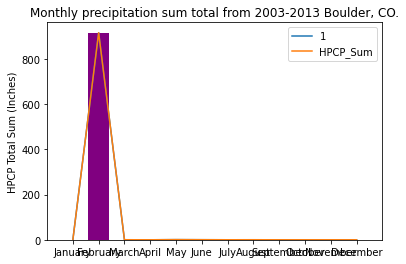

In [10]:
# Now I want to plot my findings

fig, ax = plt.subplots()
month_data.plot(ax=ax)
ax.bar(x=month_data.Month, height=month_data.HPCP_Sum, color="purple")
ax.set(title="Monthly precipitation sum total from 2003-2013 Boulder, CO.", ylabel="HPCP Total Sum (Inches)")

In [11]:
# This plot isn't what I wanted it to be....
# Can you help?

In [12]:
# Cleaner vesion I wrote to give context to what a final version could look like.

# from glob import glob
# import pandas as pd

# csv_list = glob("My_Data20**-boulder.csv")

# csv_list.sort()

# precip_dict = {}

# for i in csv_list:
#     precip_data = pd.read_csv(i, parse_dates=["DATE"], index_col=[
#         "DATE"], na_values=[999.99, " ", "missing"])[["HPCP"]]
#     resample = precip_data.resample('M').sum()

#     for i in resample.index.month:
#         if precip_dict.get(i) is None:
#             precip_dict[i] = resample.values[i-1]
#         else:
#             precip_dict[i] += resample.values[i-1]

# for i in precip_dict:
#     precip_dict[i] = precip_dict[i]/12


# monthly_sums = pd.DataFrame.from_dict(precip_dict).T

# monthly_sums = monthly_sums.rename(columns={0: "HPCP_Sum"})


# fig, ax = plt.subplots()
# ax.bar(x=monthly_sums.index, height=monthly_sums.HPCP_Sum, color="purple")
# ax.set(title="Monthly precipitation sum total from 2003-2013 Boulder, CO.",
#        ylabel="HPCP Total Sum (Inches)");